## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%config Completer.use_jedi = False

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## Load data

In [2]:
df_raw = pd.read_excel('../data/survey_answers.xlsx', sheet_name='Dados_brutos')
df_raw.head()

,Genero,Idade,Peso,Altura,IMC,Escolaridade,Estado_Civil,Filhos,Atividade_fisica_semana,Cigarros_dia,Horas_Dormidas_dia,Se_Capacitando,Outro_emprego,Ambiente_Trabalho,Categoria_Profissional,Cargo,Tempo_Empresa_anos,Tempo_Funcao_anos,Horas_Trabalhadas_Semana,Horas_Trabalhadas_Dia,Pausas_Programadas_minutos,Trabalho_Entre_Ferias_meses,Recebeu_Treinamento,Como_foi_treinado,Trabalho_Chato,Trabalho_Organizado,Prazos_Apertados,Satisfação_Gerencia,Satisfação_Dificuldades,Tempo_Pe_horas,Tempo_Sentado_horas,Tempo_Corcoras_horas,Superiores_Desconfortavel_horas,Inferiores_Desconfortavel_horas,Tronco_Curvado_horas,Tronco_Torcido_horas,Maos_Dedos_horas,Carga_6_horas,Carga_15_horas,Carga_25_horas,Movimentos_repetitivos_horas,Movimentos_Rapidos_horas,Ferramentas_Maos_horas,Ferramentas_Corpo_horas,Pescoco,Cervical,Costa_superior,Costa_media,Costa_inferior,Bacia,Ombro_esquerdo,Ombro_direito,Braco_esquerdo,Braco_direito,Cotovelo_esquerdo,Cotovelo_direito,Antebraco_esquerdo,Antebraço_direito,Mao_esquerda,Mao_direita,Coxa_esquerda,Coxa_direita,Joelho_esquerdo,Joelho_direito,Perna_esquerda,Perna_direita,Tornozelo_esquerdo,Tornozelo_direito,Pe_esquerdo,Pe_direito,Dedos_direito,Polegar_direito,Interfalange_direito,Palma_mao_direito,Punho_direito,Radial_dist_direito,Ulnar_dist_direito,Radial_prox_direito,Ulnar_prox_direito,Dedos_esquerdo,Polegar_esquerdo,Interfalange_esquerdo,Palma_mao_esquerdo,Punho_esquerdo,Radial_dist_esquerdo,Ulnar_dist_esquerdo,Radial_prox_esquerdo,Ulnar_prox_esquerdo,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,Q64,Q65,Q66,Q67,Q68,Q69,Q70,Q71,Q72
0,1,36,61.0,1.67,21.872423,3,2,2,0,0,6,2,2,2,1,Tecnico_de_enfermagem,8.0,3.0,36,12.0,30,11,2,1,1,5,5,5,4,11.0,0.5,0.0,0.0,0.0,1.0,0.0,12.0,1.0,1.0,1.0,12.0,12.0,1.0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,1,2,1,5,5,2,5,5,5,5,3,5,5,5,4,5,5,3,5,5,5,4,2,2,5,4,3,4,5,2,2,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,4,4,4,2,2,3,3,4,3,4,4,3,2,4,4,3,4,2,4,2
1,1,30,65.0,1.62,24.767566,3,2,1,5,0,6,1,2,2,1,Tecnico_de_enfermagem,4.0,7.0,40,8.0,120,11,1,5,1,4,1,4,3,4.0,4.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,8.0,0.0,0.0,0,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,2,1,1,1,1,2,1,1,1,2,1,1,1,1,1,1,3,1,4,5,4,1,5,5,5,2,4,5,4,3,4,5,1,5,5,5,5,5,4,2,2,2,1,1,2,4,3,3,2,4,4,2,3,4,4,4,3,5,4,4,2,2,5,2,2,2,5,5,5,2,3,3,2,2,2,3,2,4,5,3,5,5,2,2,2,5
2,1,40,79.0,1.51,34.647603,3,2,3,0,0,10,1,2,1,1,Tecnico_de_enfermagem,8.0,12.0,36,12.0,60,11,1,4,1,5,1,4,3,6.0,6.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,12.0,3.0,0.0,0,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,5,5,5,5,5,5,5,5,2,5,2,4,5,5,2,5,5,5,5,2,2,3,2,5,2,2,3,2,2,3,2,4,4,1,4,4,4,5,4,5,5,5,1,1,5,1,2,2,5,5,5,1,1,3,2,1,5,2,2,1,4,3,4,5,2,2,1,5
3,1,45,76.0,1.60,29.687500,3,2,1,3,0,8,1,2,1,1,Tecnico_de_enfermagem,8.0,18.0,36,12.0,60,11,1,5,2,5,4,4,3,6.0,6.0,0.0,4.0,8.0,2.0,0.0,12.0,0.0,0.0,0.0,12.0,3.0,0.0,0,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,5,5,5,5,5,5,5,4,3,5,4,4,5,5,3,5,5,5,5,2,2,2,2,1,2,2,3,2,2,2,5,4,4,2,5,4,4,4,5,5,4,4,1,1,1,1,1,1,4,5,4,1,3,4,1,2,3,2,3,2,3,4,4,4,1,1,1,3
4,1,41,67.0,1.68,23.738662,5,1,2,5,0,7,2,2,1,1,Tecnico_de_enfermagem,4.0,4.0,36,12.0,0,11,1,3,1,5,3,4,4,11.0,1.0,1.0,10.0,10.0,0.0,0.0,12.0,1.0,1.0,1.0,12.0,10.0,0.0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,5,1,1,1,1,1,2,1,1,5,1,1,1,1,1,2,1,1,5,1,1,1,1,3,1,1,1,5,5,5,5,5,5,5,1,3,3,5,5,4,5,4,5,4,5,5,2,2,4,4,5,4,3,4,2,4,4,4,4,4,2,4,4,5,3,3,3,3,5,3,3,4,2,2,2,3,4,4,2,4,2,3,1,3,3,1,4,3,4,5,5,2,2,3,4


## Data Augmentation

Recalculate BMI 

In [17]:
df_analysis = df_raw.copy()
df_analysis['IMC'] = df_analysis['Peso']/df_analysis['Altura']**2

In [18]:
def bmi_category(bmi_value):
    if bmi_value < 18:
        return 'underweight'
    elif bmi_value >= 18 and bmi_value <= 24:
        return 'normal'
    elif bmi_value > 24 and bmi_value <= 28:
        return 'overweight'
    elif bmi_value > 28:
        return 'obese'
    else:
        return 'error'

In [19]:
df_analysis.insert(loc = 1, column = 'IMC_categoria', value = df_analysis['IMC'].apply(bmi_category))

Fill the industry

In [4]:
health_jobs = {
 'Agente_de_limpeza': 'saude',
 'Assistente ': 'saude',
 'Assistente_financeiro': 'saude',
 'Assistente_operacional': 'saude',
 'Assistente_social': 'saude',
 'Auxiliar_administracao': 'saude',
 'Auxiliar_de_Laboratório': 'saude',
 'Auxiliar_de_Serviços_Gerais': 'saude',
 'Auxiliar_de_enfermagem': 'saude',
 'Biomédica': 'saude',
 'Coordenador_Farmacêutico': 'saude',
 'Cozinheira': 'saude',
 'Cumunicologa': 'saude',
 'Enfermeira': 'saude',
 'Enfermeiro': 'saude',
 'Farmacêutico_Coordenador': 'saude',
 'Fisioterapeuta': 'saude',
 'Nutricionista': 'saude',
 'Secretaria': 'saude',
 'Serviços_Gerais': 'saude',
 'Supervisora ': 'saude',
 'Tec_de_enfermagem': 'saude',
 'Tecnico_administracao': 'saude',
 'Tecnico_de_Farmacia': 'saude',
 'Tecnico_de_enfermagem': 'saude',
 'Técnico_Enfermagem': 'saude',
 'Técnico_de_Enfermagem': 'saude',
 'agente_comunitario': 'saude',
 'assistente_administrativo': 'saude',
 'assistente_social': 'saude',
 'auxilar_de_enfermagem': 'saude',
 'auxiliar_cozinha': 'saude',
 'auxiliar_de_enfermagem': 'saude',
 'auxiliar_farmacia': 'saude',
 'auxiliar_laboratorio': 'saude',
 'auxiliar_lavanderia': 'saude',
 'auxiliar_odonto': 'saude',
 'biomedica': 'saude',
 'chefe_de_setor': 'saude',
 'coordenador_internacao_hospi': 'saude',
 'porteiro': 'saude',
 'recepcionista': 'saude',
 'servicos_gerais': 'saude',
 'tecnico_de_enfermagem': 'saude',
 'tecnico_labora': 'saude',
 'tecnico_radiologia': 'saude',
 'tecnico_saude_bucal': 'saude',
 'tecnico_seg_trabalho': 'saude'
}

In [5]:
industry_jobs = {
 'Acabamento': 'industry',
 'Ajudante': 'industry',
 'Ajudante_Rebitador': 'industry',
 'Ajudante_de_Produção': 'industry',
 'Arrumador': 'industry',
 'Catador': 'industry',
 'Catadora': 'industry',
 'Cortador': 'industry',
 'Cortador ': 'industry',
 'Encarregado_producao': 'industry',
 'Enformador': 'industry',
 'Foguista': 'industry',
 'Operador_de_maquina': 'industry',
 'Operador_forno': 'industry',
 'Polidor': 'industry',
 'Repuxador': 'industry',
 'Soldador': 'industry'}

In [6]:
education_jobs = {
    'Apoio': 'education',
 'Assessor': 'education',
 'Assistente administrativo': 'education',
 'Assistente_em_Administração': 'education',
 'Aux. Adm. Educacional': 'education',
 'Aux. Serviços diversos': 'education',
 'Auxi. Serviços diversos': 'education',
 'Auxiliar_administrativa': 'education',
 'Auxiliar_de_Disciplina': 'education',
 'Bibliotecária': 'education',
 'Coordenadora': 'education',
 'Coordenadora_Pedagógica': 'education',
 'Diretor': 'education',
 'Diretor Adjunto': 'education',
 'Diretora': 'education',
 'Docente': 'education',
 'Gestor': 'education',
 'Gestora_RH': 'education',
 'Motorista': 'education',
 'Professor': 'education',
 'Professora': 'education',
 'Secretaria': 'education',
 'Secretária': 'education',
 'diretor': 'education',
 'técnico educacional': 'education'}

In [7]:
retail_jobs = {
 'Ajudante': 'retail',
 'Atendente': 'retail',
 'Auxiliar_adm': 'retail',
 'Balconista': 'retail',
 'Cambista': 'retail',
 'Empresário': 'retail',
 'Estagiária': 'retail',
 'Estagiário': 'retail',
 'Gerente': 'retail',
 'Operador_de_caixa': 'retail',
 'Projetista': 'retail',
 'Vendedor': 'retail',
 'Vendedora': 'retail'}

In [8]:
from collections import ChainMap
jobs = ChainMap(education_jobs, retail_jobs, health_jobs)

In [21]:
# df_analysis['industry'] = df_analysis['Cargo'].map(jobs)
df_analysis.insert(loc = 1, column = 'industry', value = df_analysis['Cargo'].map(jobs))

## Exploratory Data Analysis (EDA)
In this section, we'll describe the data we have in terms of its distribution of frequency of values. Also we'll try to correlate the independent variables with the dependent one.

In [ ]:
# 'Pescoco',
# 'Cervical',
# 'Costa_superior',
# 'Costa_media',
# 'Costa_inferior',
# 'Bacia',
# 'Ombro_esquerdo',
# 'Ombro_direito',
# 'Braco_esquerdo',
# 'Braco_direito',
# 'Cotovelo_esquerdo',
# 'Cotovelo_direito',
# 'Antebraco_esquerdo',
# 'Antebraço_direito',
# 'Mao_esquerda',
# 'Mao_direita',
# 'Coxa_esquerda',
# 'Coxa_direita',
# 'Joelho_esquerdo',
# 'Joelho_direito',
# 'Perna_esquerda',
# 'Perna_direita',
# 'Tornozelo_esquerdo',
# 'Tornozelo_direito',
# 'Pe_esquerdo',
# 'Pe_direito',
# 'Dedos_direito',
# 'Polegar_direito',
# 'Interfalange_direito',
# 'Palma_mao_direito',
# 'Punho_direito',
# 'Radial_dist_direito',
# 'Ulnar_dist_direito',
# 'Radial_prox_direito',
# 'Ulnar_prox_direito',
# 'Dedos_esquerdo',
# 'Polegar_esquerdo',
# 'Interfalange_esquerdo',
# 'Palma_mao_esquerdo',
# 'Punho_esquerdo',
# 'Radial_dist_esquerdo',
# 'Ulnar_dist_esquerdo',
# 'Radial_prox_esquerdo',
# 'Ulnar_prox_esquerdo',
# 'Ulnar_prox_esquerdo',

In [48]:
continous_columns = [
                    'Idade', 
                    'Horas_Trabalhadas_Semana',
                    'Horas_Trabalhadas_Dia',
                    'Trabalho_Entre_Ferias_meses',
                    'Tempo_Pe_horas',
                    'Tempo_Sentado_horas',
                    'Tempo_Corcoras_horas',
                    'Cigarros_dia',
                    'Horas_Dormidas_dia',
                    'Horas_Trabalhadas_Dia',
                    'Pausas_Programadas_minutos',
                    'Trabalho_Entre_Ferias_meses',
                    'Tempo_Sentado_horas',
                    'Tempo_Corcoras_horas',
                    'Superiores_Desconfortavel_horas',
                    'Inferiores_Desconfortavel_horas',
                    'Tronco_Curvado_horas',
                    'Tronco_Torcido_horas',
                    'Maos_Dedos_horas',
                    'Carga_6_horas',
                    'Carga_15_horas',
                    'Carga_25_horas',
                    'Movimentos_repetitivos_horas',
                    'Movimentos_Rapidos_horas',
                    'Ferramentas_Maos_horas',
                    'Ferramentas_Corpo_horas',
                    ]
categorical_columns = ['Genero']
target_columns = ['Costa_superior', 'Costa_media', 'Costa_inferior']

useful_columns = continous_columns + categorical_columns + target_columns[0:1]

In [49]:
df_analysis[continous_columns].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Idade,420.0,37.485714,10.458340,18.0,29.0,37.50,45.00,64.0
Horas_Trabalhadas_Semana,420.0,33.028571,13.957629,2.0,25.0,36.00,44.00,96.0
Horas_Trabalhadas_Dia,420.0,12.838810,11.601506,2.0,6.0,8.00,12.00,66.0
Trabalho_Entre_Ferias_meses,420.0,20.204762,16.210900,4.0,11.0,12.00,30.00,48.0
Tempo_Pe_horas,420.0,6.420111,4.199126,0.0,3.0,6.00,8.00,22.0
Tempo_Sentado_horas,420.0,2.732325,2.806429,0.0,1.0,2.00,4.00,30.0
Tempo_Corcoras_horas,420.0,0.267421,0.985536,0.0,0.0,0.00,0.00,11.0
Cigarros_dia,420.0,0.350000,2.062016,0.0,0.0,0.00,0.00,20.0
Horas_Dormidas_dia,420.0,6.916667,1.346864,4.0,6.0,7.00,8.00,12.0
Horas_Trabalhadas_Dia,420.0,12.838810,11.601506,2.0,6.0,8.00,12.00,66.0


In [30]:
eda_df = df_analysis[useful_columns].groupby(by = target_columns[0:1]).describe(percentiles = [0.25, 0.5, 0.75, 0.8, 0.95]).transpose()
eda_df.to_excel('../reports/features-describe.xlsx')

In [43]:
df_plot = df_analysis[continous_columns + target_columns].drop(columns = ['Costa_media', 'Costa_inferior']).melt(id_vars = ['Costa_superior'])

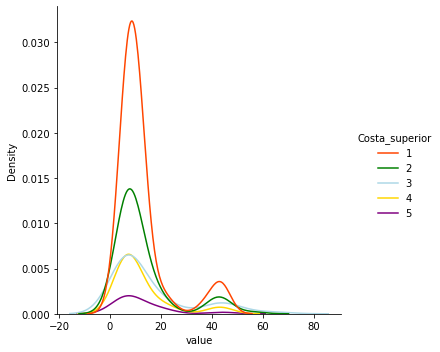

In [37]:
sns.displot(data = df_plot[df_plot['variable'] == 'Horas_Trabalhadas_Dia'],
            x = 'value',
            hue = 'Costa_superior',
            kind = 'kde',
            palette=sns.color_palette(['orangered', 'green', 'lightblue', 'gold', 'purple']),
            
           )

/Users/56325/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/56325/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/Users/56325/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


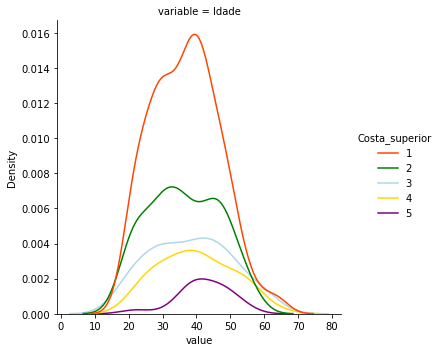

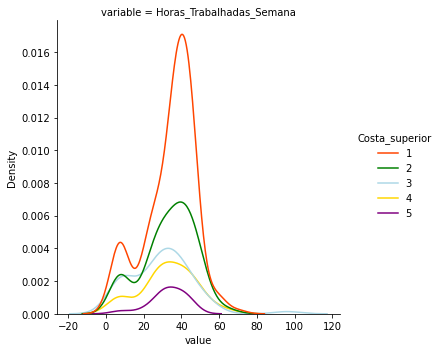

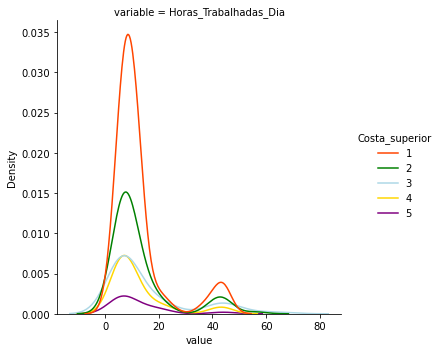

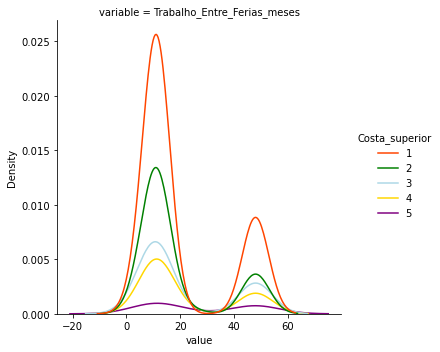

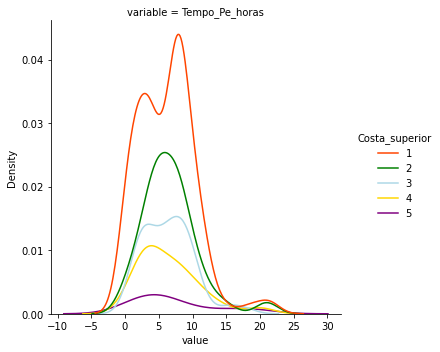

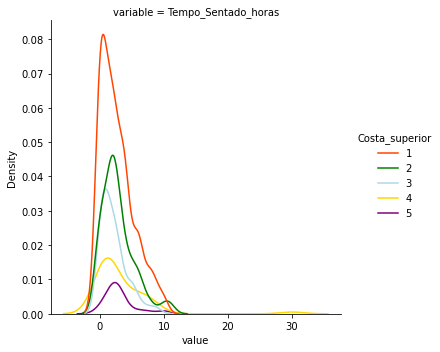

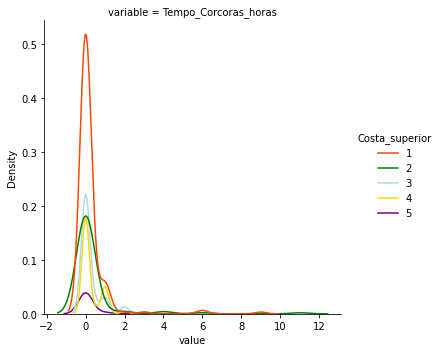

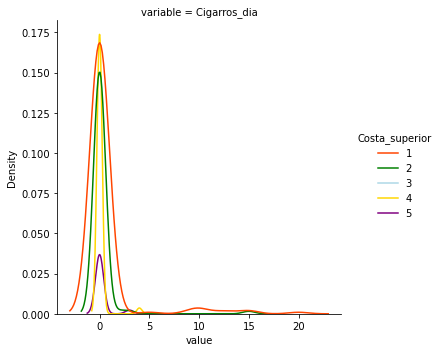

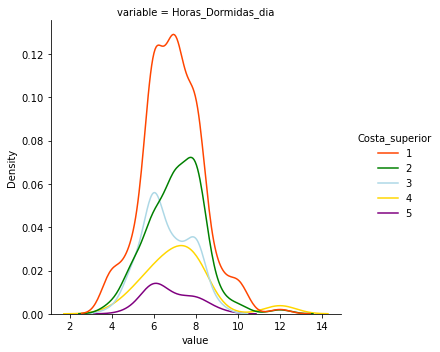

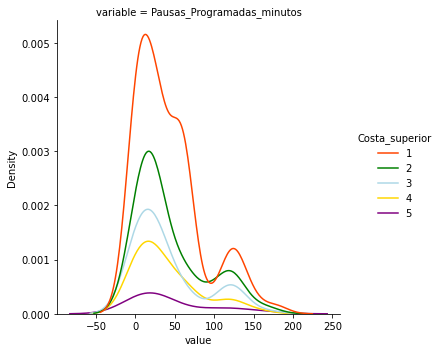

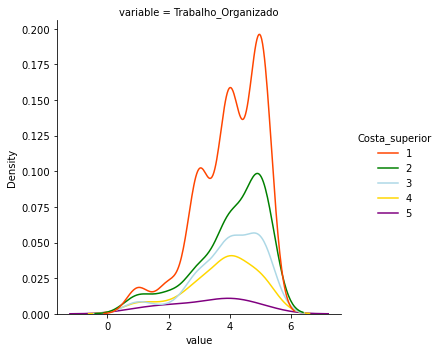

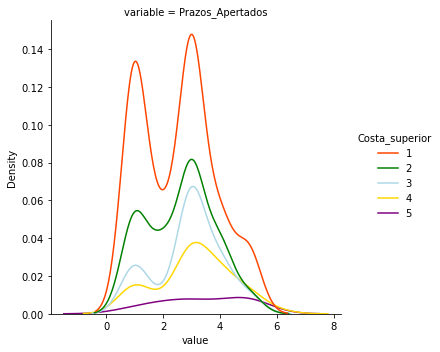

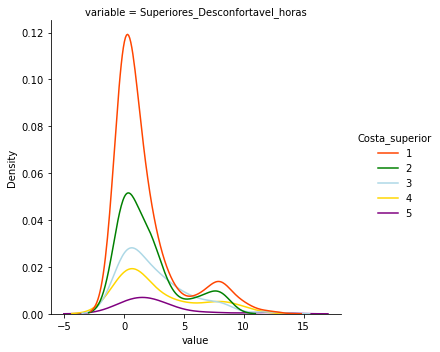

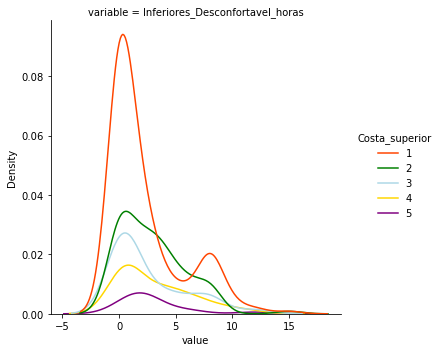

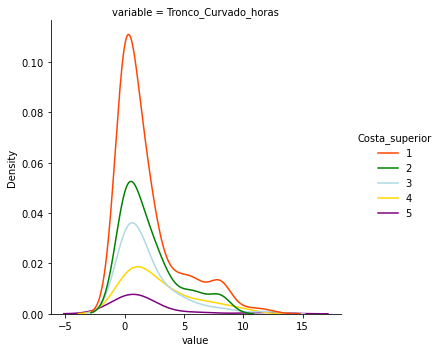

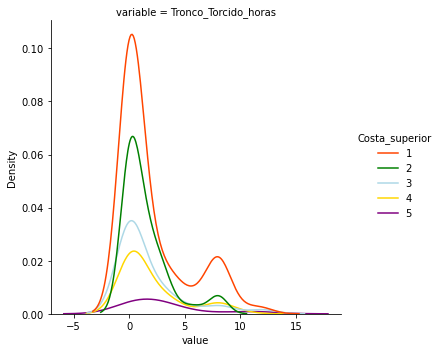

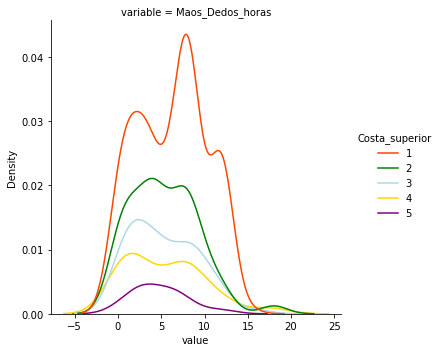

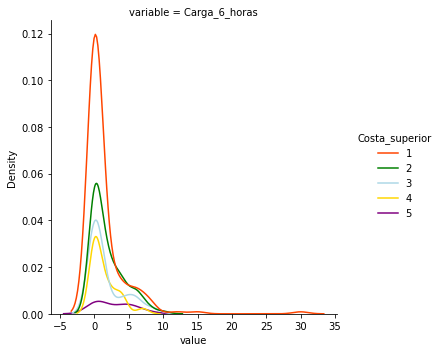

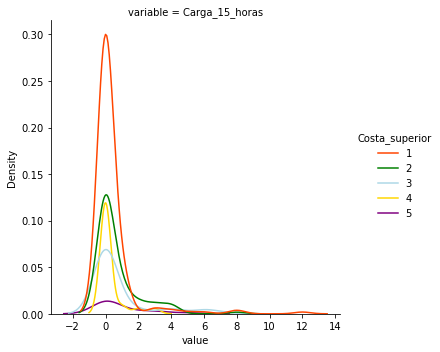

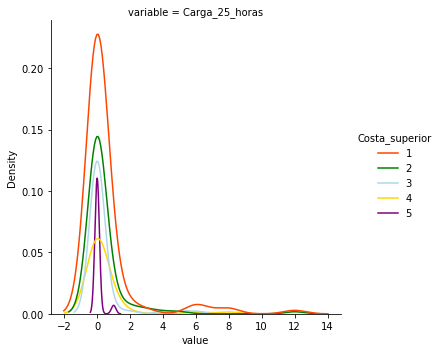

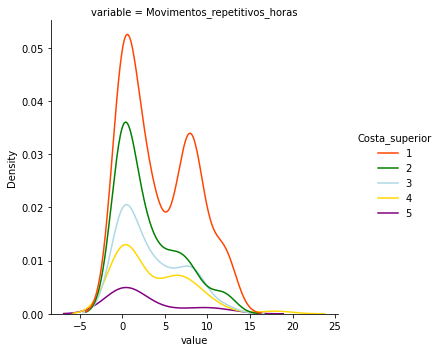

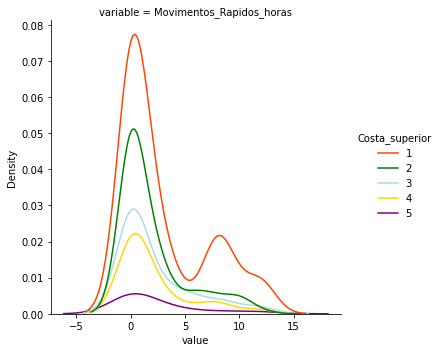

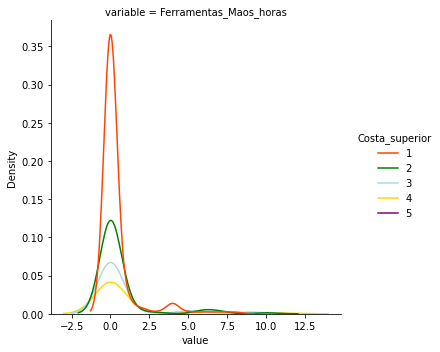

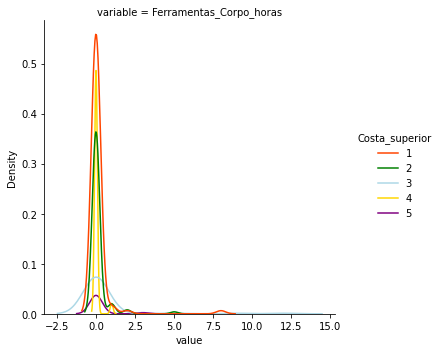

In [46]:
# sns.displot(
#     df_plot, x="variable", col="value",
#     binwidth=3, height=3, facet_kws=dict(margin_titles=True),
# )
target = target_columns[0]
for variable in df_plot['variable'].unique():
    g = sns.displot(data = df_plot[df_plot['variable'].isin([variable])],
                x = 'value',
                hue = target,
                kind = 'kde',
                row = 'variable',
                palette=sns.color_palette(['orangered', 'green', 'lightblue', 'gold', 'purple']),
               )
    g.savefig(f'../reports/target_{target}_var_{variable}.png')

In [ ]:
from patsy import dmatrices
import statsmodels.api as sm 

df = pd.read_csv('sample.csv')
y, X = dmatrices( 'hon ~ female', data=df, return_type='dataframe')
mod = sm.Logit(y, X)
res = mod.fit()
print(res.summary())


# y = df.hon.values
# X = df.math.values
# y = y.reshape(200,1)
# X = X.reshape(200,1)
# clf = LogisticRegression(C=1e5)
# clf.fit(X,y)
# clf.coef_
# clf.intercept_